# Name:Prajwal KV

# E-commerce Dataset

# Dataset Link:https://www.kaggle.com/carrie1/ecommerce-data

# AIM:To predict the unit Price for unseen Data

### Import necessary Files for analysis

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## import training Data

In [71]:
train=pd.read_csv('train.csv')
print(train.shape,'\n')
print(train.info(),'\n')
print(train.describe())

(284780, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB
None 

           InvoiceNo      StockCode    Description       Quantity  \
count  284780.000000  284780.000000  284780.000000  284780.000000   
mean     9955.394083    1573.386807    2023.955573      12.028468   
std      5551.519138     843.604991    1089.812078     295.111588   
min         0.000000       0.000000       0.000000  -80995.000000   
25%      5069.000000     939.00

In [72]:
train.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35


In [73]:
print("Total number of rows in the Dataset:",train.shape[0])
print("Total number of columns in the Dataset:",train.shape[1])

Total number of rows in the Dataset: 284780
Total number of columns in the Dataset: 8


## checking for duplicate value in the dataset

In [74]:
print(train.duplicated().sum())

2621


## Remove the Duplicate values 

In [75]:
train=train.drop_duplicates()
print(train.duplicated().sum())

0


In [76]:
print("Total number of rows in the Dataset after removing Duplicates:",train.shape[0])

Total number of rows in the Dataset after removing Duplicates: 282159


## checking for any null values in the training Dataset

In [77]:
train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Luckily we have no null values in our Training Dataset 

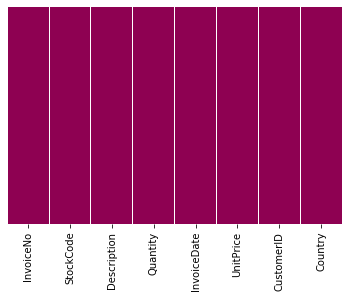

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

## Check correlation among dependent and Independent Variables.Interpreting the correlation using covariance is difficult.so,let's use pearson correalation 

In [10]:
train.cov()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,3.077313e+07,405694.698353,1.478024e+05,-13751.589766,3494.583329,-7.007637e+04,198.136090
StockCode,4.056947e+05,712022.327256,-1.221160e+04,-246.817368,1338.455313,4.844305e+03,36.167510
Description,1.478024e+05,-12211.596203,1.188085e+06,62.231346,-35.674986,-9.412886e+03,-108.033564
Quantity,-1.375159e+04,-246.817368,6.223135e+01,87890.790160,-21.626176,-1.443244e+03,-15.901892
UnitPrice,3.494583e+03,1338.455313,-3.567499e+01,-21.626176,6203.523248,-6.640920e+02,-2.851078
CustomerID,-7.007637e+04,4844.304992,-9.412886e+03,-1443.244206,-664.091991,2.939967e+06,4514.360307
Country,1.981361e+02,36.167510,-1.080336e+02,-15.901892,-2.851078,4.514360e+03,45.811537


## Pearson method Tells us that most of our independent variables share no(zero)relation with the Dependent variable(target variable-Unit Price).It means the problem is with the Dependent variable

In [11]:
train.corr(method='pearson')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086670,0.024444,-0.008362,0.007998,-0.007367,0.005277
StockCode,0.086670,1.000000,-0.013277,-0.000987,0.020139,0.003348,0.006333
Description,0.024444,-0.013277,1.000000,0.000193,-0.000416,-0.005036,-0.014644
Quantity,-0.008362,-0.000987,0.000193,1.000000,-0.000926,-0.002839,-0.007925
UnitPrice,0.007998,0.020139,-0.000416,-0.000926,1.000000,-0.004917,-0.005348
CustomerID,-0.007367,0.003348,-0.005036,-0.002839,-0.004917,1.000000,0.388989
Country,0.005277,0.006333,-0.014644,-0.007925,-0.005348,0.388989,1.000000


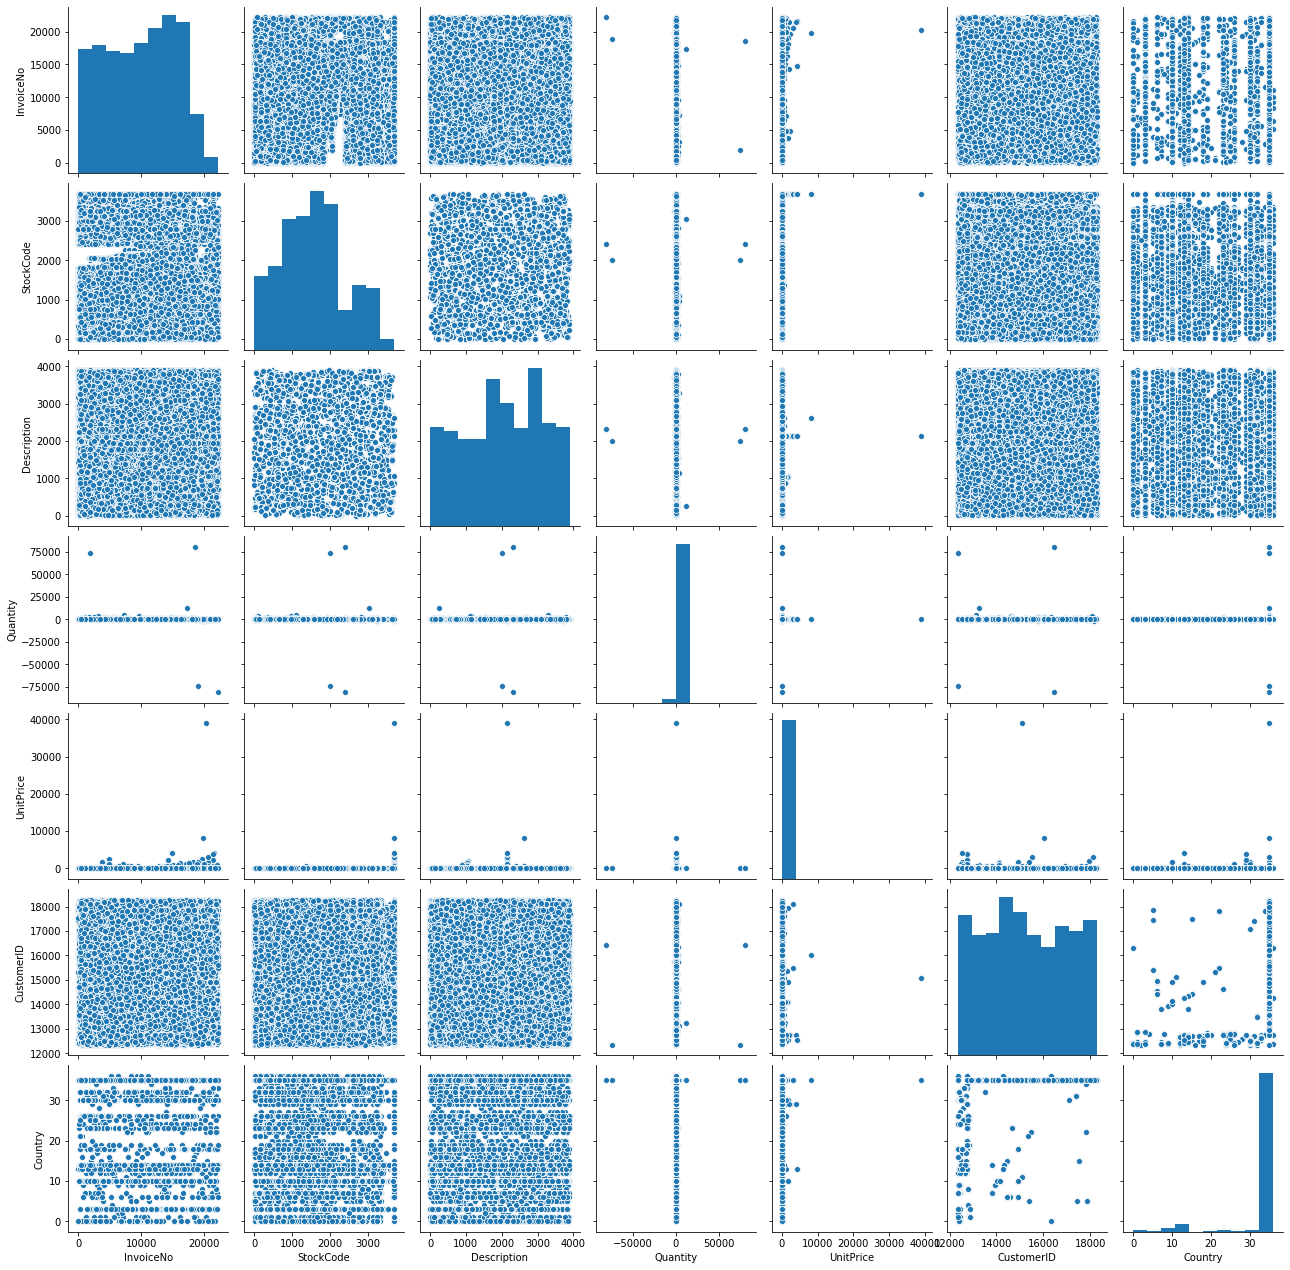

In [12]:
sns.pairplot(data=train)

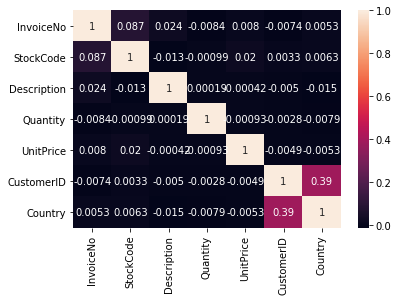

In [12]:
sns.heatmap(train.corr(),annot=True)

## Target Variable(Unit Price)doesn't follow Normal Distribution.we can cleary see that the Dependent variable is skewed(postively-mode>median>mean).

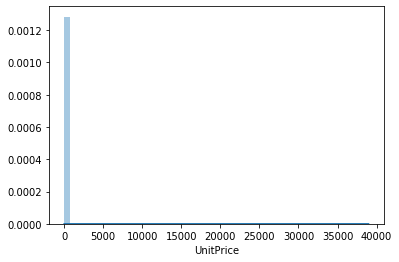

In [78]:
sns.distplot(train['UnitPrice'])

## visualization of Skewed Dependent variable

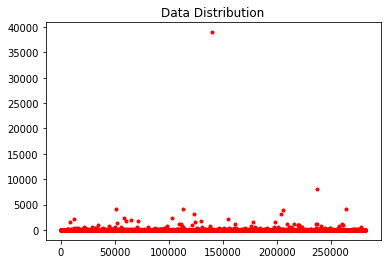

In [79]:
fig = plt.figure()
plt.plot([i for i in range(1,282160)],train['UnitPrice'],'r.')
plt.title('Data Distribution')
plt.show()

In [80]:
train['UnitPrice'].describe()

count    282159.000000
mean          3.460501
std          78.762448
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

## skew value of dependent variable(unitprice is 436.32)

In [81]:
train.skew()

InvoiceNo       -0.076632
StockCode        0.271076
Description     -0.133745
Quantity         0.223878
UnitPrice      436.324717
CustomerID       0.032807
Country         -3.034005
dtype: float64

436.3247174443802

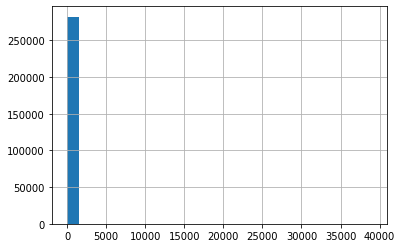

In [82]:
train.UnitPrice.hist(bins = 25)
print()
train.UnitPrice.skew()

In [83]:
y=train['UnitPrice']

## To solve the skewness issue we need to use power transformation for Dependent variable(UnitPrice).To make it symmetric

In [162]:
from sklearn.preprocessing import PowerTransformer
y1 = y.values.reshape(-1,1)
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
y2 = power.fit_transform(y1)

## After applying Power Transformation now the Dependent variable Follows Normal Distribution

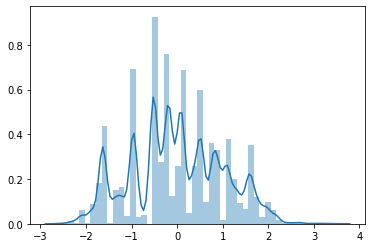

In [85]:
sns.distplot(y2)

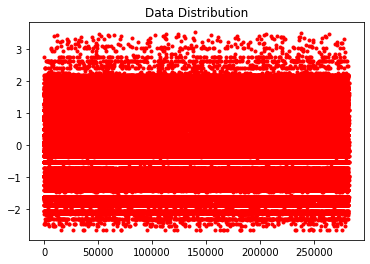

In [86]:
fig = plt.figure()
plt.plot([i for i in range(1,282160)],y2,'r.')
plt.title('Data Distribution')
plt.show()

In [87]:
Target_UnitPrice=pd.DataFrame(y2)

In [88]:
Target_UnitPrice

,0
0,0.786367
1,0.012465
2,1.281492
3,-0.980036
4,-0.189637
...,...
282154,-0.189637
282155,-1.229498
282156,1.621266
282157,0.691285


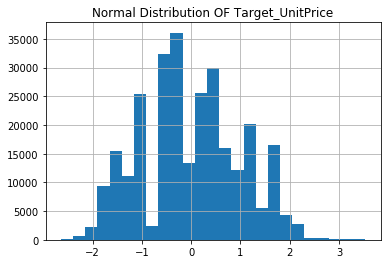

In [89]:
Target_UnitPrice.hist(bins = 25)
print()
Target_UnitPrice.skew()
plt.title('Normal Distribution OF Target_UnitPrice')
plt.show()

## Here,I have taken only three independent features based on correlation values

In [90]:
x=train.drop(['InvoiceNo','InvoiceDate','CustomerID','Country','UnitPrice'],axis=1)
y2

array([[ 0.78636662],
       [ 0.01246461],
       [ 1.28149173],
       ...,
       [ 1.6212657 ],
       [ 0.69128455],
       [-1.08609843]])

<Figure size 720x504 with 0 Axes>

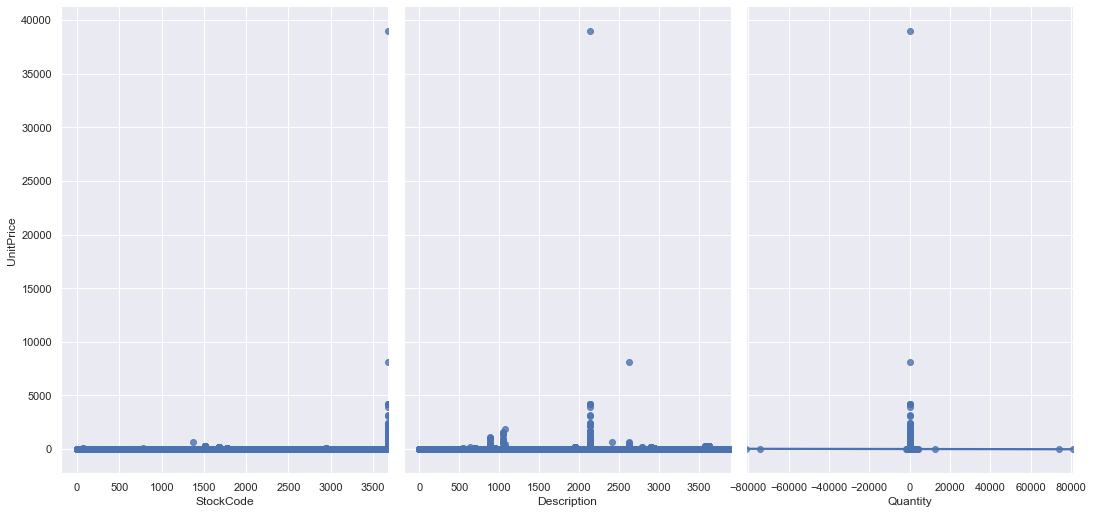

In [20]:
sns.set()
plt.figure(figsize=(10,7))
sns.pairplot(train,x_vars=['StockCode','Description','Quantity'],y_vars='UnitPrice',size=7,aspect=0.7,kind='reg')

## Splitting the training data into Training (70%) and For Testing (30%)

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.30,random_state=7)

## Now importing Linear Regression algorithms from scikit learn package

In [92]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete.")

Training complete.


In [93]:
y_pred = regressor.predict(x_test)

## coefficient value of Three features(stock code,description,quantity)

In [94]:
print(regressor.coef_)

[[ 1.21260151e-04 -2.04334645e-05 -7.50130070e-05]]


## intercept value 

In [95]:
print(regressor.intercept_)

[-0.14778419]


## I know what you are thinking after seeing the R square value.R square value nearer to zero doesn't mean that our model is bad.In some cases the Best Fitted line for the Data might  look like what  we have seen in the below plot.Here the Intercept line(-0.14) and the Best fit line both are on the same line.

In [164]:
print("R square value by default using regressor",regressor.score(x_test,y_test))

R square value by default using regressor 0.011725362604038447


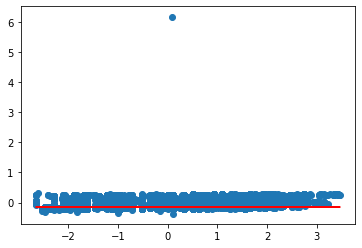

In [165]:
def predict(x):
    return slope*x+intercepts
fitline=predict(y_test)
plt.scatter(y_test,y_pred)
plt.plot(y_test,fitline,c='r')
plt.show()

In [166]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 0.8018297313137276


In [167]:
slope=regressor.coef_
intercepts=regressor.intercept_

In [168]:
print('metrics.mean_squared_error',metrics.mean_squared_error(y_test,y_pred).mean())

metrics.mean_squared_error 0.9805438664779202


In [169]:
print("Root mean_squared_error",np.sqrt(metrics.mean_squared_error(y_test,y_pred).mean()))

Root mean_squared_error 0.9902241496135712


# Linear Regression using statsmodels

In [170]:
X_with_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, X_with_constant)

In [171]:
results = model.fit()
results.params

const         -0.147784
StockCode      0.000121
Description   -0.000020
Quantity      -0.000075
dtype: float64

## Based on the p-value and F-statistic value.we can say that Independent variables and Dependent variable shares some Relation between each other.Therefore , we can reject the NULL HYPOTHESIS(HO)

In [172]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     767.5
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:15:36   Log-Likelihood:            -2.7944e+05
No. Observations:              197511   AIC:                         5.589e+05
Df Residuals:                  197507   BIC:                         5.589e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1478      0.006    -23.300      

# No Multicolinearity(Variable inflation factor values are less than 5 and 10.so we can say that no multicolinearity among Features(independent variables)

In [173]:
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x_train.columns).T

,StockCode,Description,Quantity
vif,2.483839,2.483845,1.001519


# Normailty of Residual(Error-Difference between the Actual values and Predicted values)

In [174]:
residual = y_test - y_pred

In [175]:
residual

array([[ 0.36629627],
       [-0.00384054],
       [ 0.10138313],
       ...,
       [-0.15768344],
       [ 1.11862893],
       [ 0.92615385]])

## Centered around Zero(one of the assumption of normal distribution)

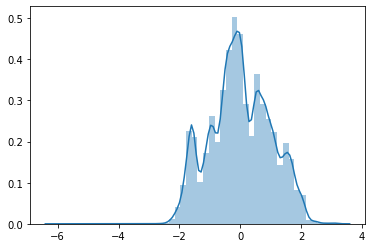

In [108]:
sns.distplot(residual)

####If the Distribution is equal to zero means then the overall mean value should be equal to zero or nearer to zero.Here mean value is very small(-0.0025).Based on this mean value I can say that the values are normally distributed and values are good enough(near Normal Distribution)

In [109]:
np.mean(residual)

-0.002575798892774778

# Homoscedasticity

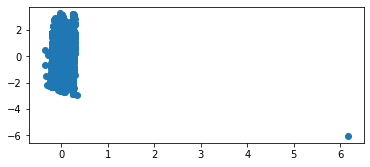

In [110]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(y_pred, residual)
plt.show()

# autocorrelation of residuals(Residual with itself is highly correlated(1.0)).Again in this plot follows a pattern because of postively skewed Dependent variable(Target variable).I used power transformation to make the skewed Data to symmetric.so that's why the plot looks like this.

# Because of power transformation here we can't see any significance(threshold)level of the autocorrelation it should cross.

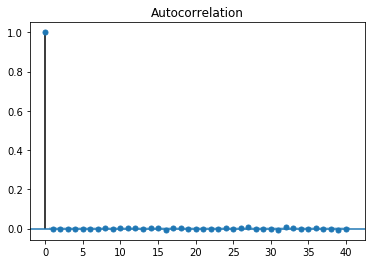

In [111]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

## Now import the test Data (To check the linear Regression model on the Testing data)

In [176]:
test=pd.read_csv('test.csv')

In [177]:
print(test.shape,'\n')
print(test.info(),'\n')
print(test.describe())

(122049, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB
None 

           InvoiceNo      StockCode    Description       Quantity  \
count  122049.000000  122049.000000  122049.000000  122049.000000   
mean     9940.419692    1572.955788    2026.412744      12.137920   
std      5554.116349     845.106082    1087.697388      54.311646   
min         0.000000       0.000000       0.000000   -9360.000000   
25%      5018.000000     937.000000    1147.000000       2.000000   
50%   

In [179]:
print("Total number of rows in the Dataset:",test.shape[0])
print("Total number of columns in the Dataset:",test.shape[1])

Total number of rows in the Dataset: 122049
Total number of columns in the Dataset: 7


In [178]:
test.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

## Luckily we have no null values in our Testing Dataset

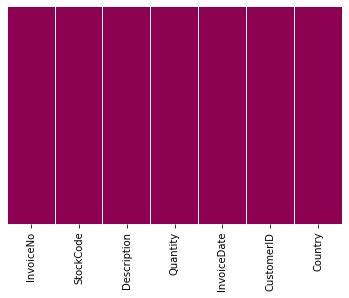

In [115]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

In [182]:
test=test.drop(['InvoiceNo','InvoiceDate','CustomerID','Country'],axis=1)

## Now Test our Model on the Unseen Data(Testing Data)

In [183]:
# apply the whole pipeline to data
results = regressor.predict(test)

In [184]:
results

array([[ 0.03717666],
       [-0.15665501],
       [-0.09142435],
       ...,
       [-0.04715197],
       [ 0.02061452],
       [ 0.09075594]])

In [185]:
result = pd.DataFrame(data=results)
result.head()

,0
0,0.037177
1,-0.156655
2,-0.091424
3,-0.039677
4,0.224316


In [186]:
# Applying inverse power transform to get back original form of unit price
a_inverse_transformed = power.inverse_transform(result)
a_inverse_transformed

array([[1.99018676],
       [1.69570869],
       [1.78970222],
       ...,
       [1.85635738],
       [1.96316239],
       [2.08022056]])

# Predicted values using Linear Regeression Model 

In [188]:
result = pd.DataFrame(data=a_inverse_transformed).round(2)
result

,0
0,1.99
1,1.70
2,1.79
3,1.87
4,2.32
...,...
122044,2.14
122045,2.31
122046,1.86
122047,1.96


# Train our Model using Decision Tree Regressor Algorithm

In [123]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel=DecisionTreeRegressor()
DecisionTreeModel.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [124]:
y_pred_Decision_Tree=DecisionTreeModel.predict(x_test)

In [125]:
print("R square value by default using regressor",regressor.score(x_test,y_test))

R square value by default using regressor 0.011725362604038447


In [126]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred_Decision_Tree)) 

Mean Absolute Error: 0.06407429324437691


In [127]:
print('metrics.mean_squared_error',metrics.mean_squared_error(y_test,y_pred_Decision_Tree).mean())

metrics.mean_squared_error 0.05599025812739146


In [128]:
print("Root Mean Squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_Decision_Tree).mean()))

Root Mean Squared error 0.2366226069660113


## Text Representation Of Decision Tree

In [129]:
from sklearn import tree
text_representation = tree.export_text(DecisionTreeModel)
print(text_representation)

|--- feature_2 <= 9.50
|   |--- feature_0 <= 1007.50
|   |   |--- feature_0 <= 993.50
|   |   |   |--- feature_0 <= 446.50
|   |   |   |   |--- feature_0 <= 278.50
|   |   |   |   |   |--- feature_1 <= 1172.50
|   |   |   |   |   |   |--- feature_1 <= 1016.50
|   |   |   |   |   |   |   |--- feature_0 <= 142.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 485.00
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 24.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 467.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  467.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_0 >  24.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 344.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  344.50
|   |   |   |   |  

## Visualization of Decision Tree using Graphviz 

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
import graphviz
# DOT data
dot_data = tree.export_graphviz(DecisionTreeModel,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Now Test our Model on the Unseen Data(Testing Data)

In [130]:
Decision_Results=DecisionTreeModel.predict(test).reshape(-1, 1) 

In [131]:
# Applying inverse power transform to get back original form of unit price
a_inverse_transformed_Decision = power.inverse_transform(Decision_Results)
a_inverse_transformed_Decision

array([[1.65      ],
       [1.13223935],
       [3.26573971],
       ...,
       [1.25      ],
       [3.95      ],
       [4.15      ]])

## Predicted values using Decision Regeression Model 

In [132]:
Decision_Results = pd.DataFrame(data=a_inverse_transformed_Decision).round(2)
Decision_Results

,0
0,1.65
1,1.13
2,3.27
3,1.61
4,12.75
...,...
122044,0.38
122045,1.69
122046,1.25
122047,3.95


## Before Training our model using KNN.we need to scale the Data

In [189]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
Y = sc_y.fit_transform(y2)

In [190]:
from sklearn.model_selection import train_test_split
xs_train,xs_test,ys_train,ys_test=train_test_split(X,Y,test_size=0.30,random_state=7)

# Train our Model using KNN Regressor Algorithm¶

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from math import sqrt

## check the best k value using rmse value..when k=3,we have less rmse value(0.2410)

In [64]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(xs_train,ys_train)  #fit the model
    pred=model.predict(xs_test) #make prediction on test set
    error = sqrt(metrics.mean_squared_error(ys_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.2707713984248459
RMSE value for k=  2 is: 0.2466620819221183
RMSE value for k=  3 is: 0.24101078498807757
RMSE value for k=  4 is: 0.24195866802860314
RMSE value for k=  5 is: 0.2443651804915993
RMSE value for k=  6 is: 0.24741560650549801
RMSE value for k=  7 is: 0.2518856974159771
RMSE value for k=  8 is: 0.2552051631779556
RMSE value for k=  9 is: 0.2587914410506301
RMSE value for k=  10 is: 0.2616064208331834
RMSE value for k=  11 is: 0.2647874990937567
RMSE value for k=  12 is: 0.26809693168759613
RMSE value for k=  13 is: 0.2713791004926619
RMSE value for k=  14 is: 0.274542986803648
RMSE value for k=  15 is: 0.27800739091545107
RMSE value for k=  16 is: 0.28109744794996994
RMSE value for k=  17 is: 0.28425384055303926
RMSE value for k=  18 is: 0.2873148911161007
RMSE value for k=  19 is: 0.2903191399121746
RMSE value for k=  20 is: 0.2932440225059756


## visualize the Elbow method

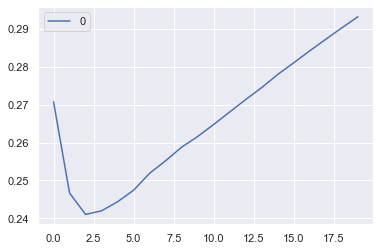

In [65]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# If Bored of using above methods just find the k value using Grid Search.we will get the Same value.

In [67]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(xs_train,ys_train)
model.best_params_


{'n_neighbors': 3}

In [137]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(xs_train,ys_train)
pred=neigh.predict(xs_test) 

In [138]:
print("R square value by default using regressor",regressor.score(xs_test,ys_test))

R square value by default using regressor -0.02145702454697429


In [70]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(ys_test,pred)) 

Mean Absolute Error: 0.07098844436395559


In [71]:
print('metrics.mean_squared_error',metrics.mean_squared_error(ys_test,pred).mean())

metrics.mean_squared_error 0.05808619848056936


In [161]:
print("Root mean_squared_error",np.sqrt(metrics.mean_squared_error(ys_test,pred).mean()))

Root mean_squared_error 0.24101078498807757


## Now Test our Model on the Unseen Data(Testing Data)

In [73]:
KNN_Results=neigh.predict(test) 

In [74]:
# Applying inverse power transform to get back original form of unit price
a_inverse_transformed_KNN = power.inverse_transform(KNN_Results)
a_inverse_transformed_KNN

array([[3.75250345],
       [7.95      ],
       [5.94755881],
       ...,
       [4.94070649],
       [5.94755881],
       [3.75250345]])

## Predicted values using KNN Regeression Model 

In [75]:
KNN_Results = pd.DataFrame(data=a_inverse_transformed_KNN).round(2)
KNN_Results

,0
0,3.75
1,7.95
2,5.95
3,4.94
4,3.75
...,...
122044,3.75
122045,8.28
122046,4.94
122047,5.95


In [191]:
data=[{'Linear Regression':regressor.score(x_test,y_test),'KNN':regressor.score(xs_test,ys_test),'Decision Tree':regressor.score(x_test,y_test)},
     {'Linear Regression':metrics.mean_absolute_error(y_test,y_pred),'KNN':metrics.mean_absolute_error(ys_test,pred),'Decision Tree':metrics.mean_absolute_error(y_test,y_pred_Decision_Tree)},
     {'Linear Regression':metrics.mean_squared_error(y_test,y_pred).mean(),'KNN':metrics.mean_squared_error(ys_test,pred).mean(),'Decision Tree':metrics.mean_squared_error(y_test,y_pred_Decision_Tree).mean()},
     {'Linear Regression':np.sqrt(metrics.mean_squared_error(y_test,y_pred).mean()),'KNN':np.sqrt(metrics.mean_squared_error(ys_test,pred).mean()),'Decision Tree':np.sqrt(metrics.mean_squared_error(y_test,y_pred_Decision_Tree).mean())}]
Overall_Results=pd.DataFrame(data,index=['R-squared value','Mean Absolute Value','Mean Squared Error','Root Mean Squared Error'])
Overall_Results

,Linear Regression,KNN,Decision Tree
R-squared value,0.011725,-0.021457,0.011725
Mean Absolute Value,0.801830,0.070988,0.064074
Mean Squared Error,0.980544,0.058086,0.055990
Root Mean Squared Error,0.990224,0.241011,0.236623


## From the above Table we can see that  Decision Tree is the Best Algorithm For this Data Set(Based on the Root mean squared Error(RMSE)).RMSE value of Decision Tree Regressor is 0.23 (small Compared to other Algorithms).We can improve our model by removing the Outliers. 